#  A partir de las características celulares observadas, ¿Es el tumor maligno o benigno?

In [18]:
# librerias a usar
import pandas as pd               

import numpy as np                 

from sklearn.model_selection import train_test_split  

from sklearn.naive_bayes import GaussianNB            

from sklearn.metrics import accuracy_score, precision_score, recall_score

import seaborn as sns

import matplotlib.pyplot as plt

In [6]:
# imprime la base de datos
df = pd.read_csv("cancer_de_mama.csv", index_col=0)
df

# Columnas de la base de datos:
# id: Identificador único del paciente
# diagnosis: Diagnóstico del cáncer: M (Maligno) o B (Benigno)

# Promedio:
# radius_mean: Promedio del radio
# texture_mean: Promedio de la textura
# perimeter_mean: Promedio del perímetro
# area_mean: Promedio del área
# smoothness_mean: Promedio de la suavidad
# compactness_mean: Promedio de la compacidad
# concavity_mean: Promedio de la concavidad
# concave points_mean: Promedio de los puntos cóncavos
# symmetry_mean: Promedio de la simetría
# fractal_dimension_mean: Promedio de la dimensión fractal

# Error estándar:
# radius_se: Error estándar del radio
# texture_se: Error estándar de la textura
# perimeter_se: Error estándar del perímetro
# area_se: Error estándar del área
# smoothness_se: Error estándar de la suavidad
# compactness_se: Error estándar de la compacidad
# concavity_se: Error estándar de la concavidad
# concave points_se: Error estándar de los puntos cóncavos
# symmetry_se: Error estándar de la simetría
# fractal_dimension_se: Error estándar de la dimensión fractal

# Peor valor:
# radius_worst: Peor radio
# texture_worst: Peor textura
# perimeter_worst: Peor perímetro
# area_worst: Peor área
# smoothness_worst: Peor suavidad
# compactness_worst: Peor compacidad
# concavity_worst: Peor concavidad
# concave points_worst: Peor cantidad de puntos cóncavos
# symmetry_worst: Peor simetría
# fractal_dimension_worst: Peor dimensión fractal


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [54]:
# imprime las primeras 5 filas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
# imprime todas las columnas
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [73]:
# imprime las columnas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              555 non-null    float64
 2   texture_mean             562 non-null    float64
 3   perimeter_mean           556 non-null    float64
 4   area_mean                544 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         553 non-null    float64
 7   concavity_mean           551 non-null    float64
 8   concave points_mean      559 non-null    float64
 9   symmetry_mean            554 non-null    float64
 10  fractal_dimension_mean   554 non-null    float64
 11  radius_se                531 non-null    float64
 12  texture_se               549 non-null    float64
 13  perimeter_se             531 non-null    float64
 14  area_se                 

In [16]:
# Maligno: Significa que es agresivo, potencialmente peligroso y puede diseminarse a otras partes del cuerpo. 
# En el contexto del cáncer de mama, esto implica que las células cancerosas pueden crecer de manera descontrolada 
# y causar daños en los tejidos cercanos.

# Benigno: Indica que no es agresivo y no representa un riesgo significativo para la salud. 
# En el caso de los tumores benignos en el seno, aunque pueden causar molestias o preocupaciones 
# no se diseminan ni invaden otros tejidos.

# Reemplazar los valores en la columna 'diagnosis'

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Maligno = 1, Benigno = 0

# Mostrar las primeras 20 filas del DataFrame
df.head(20)



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

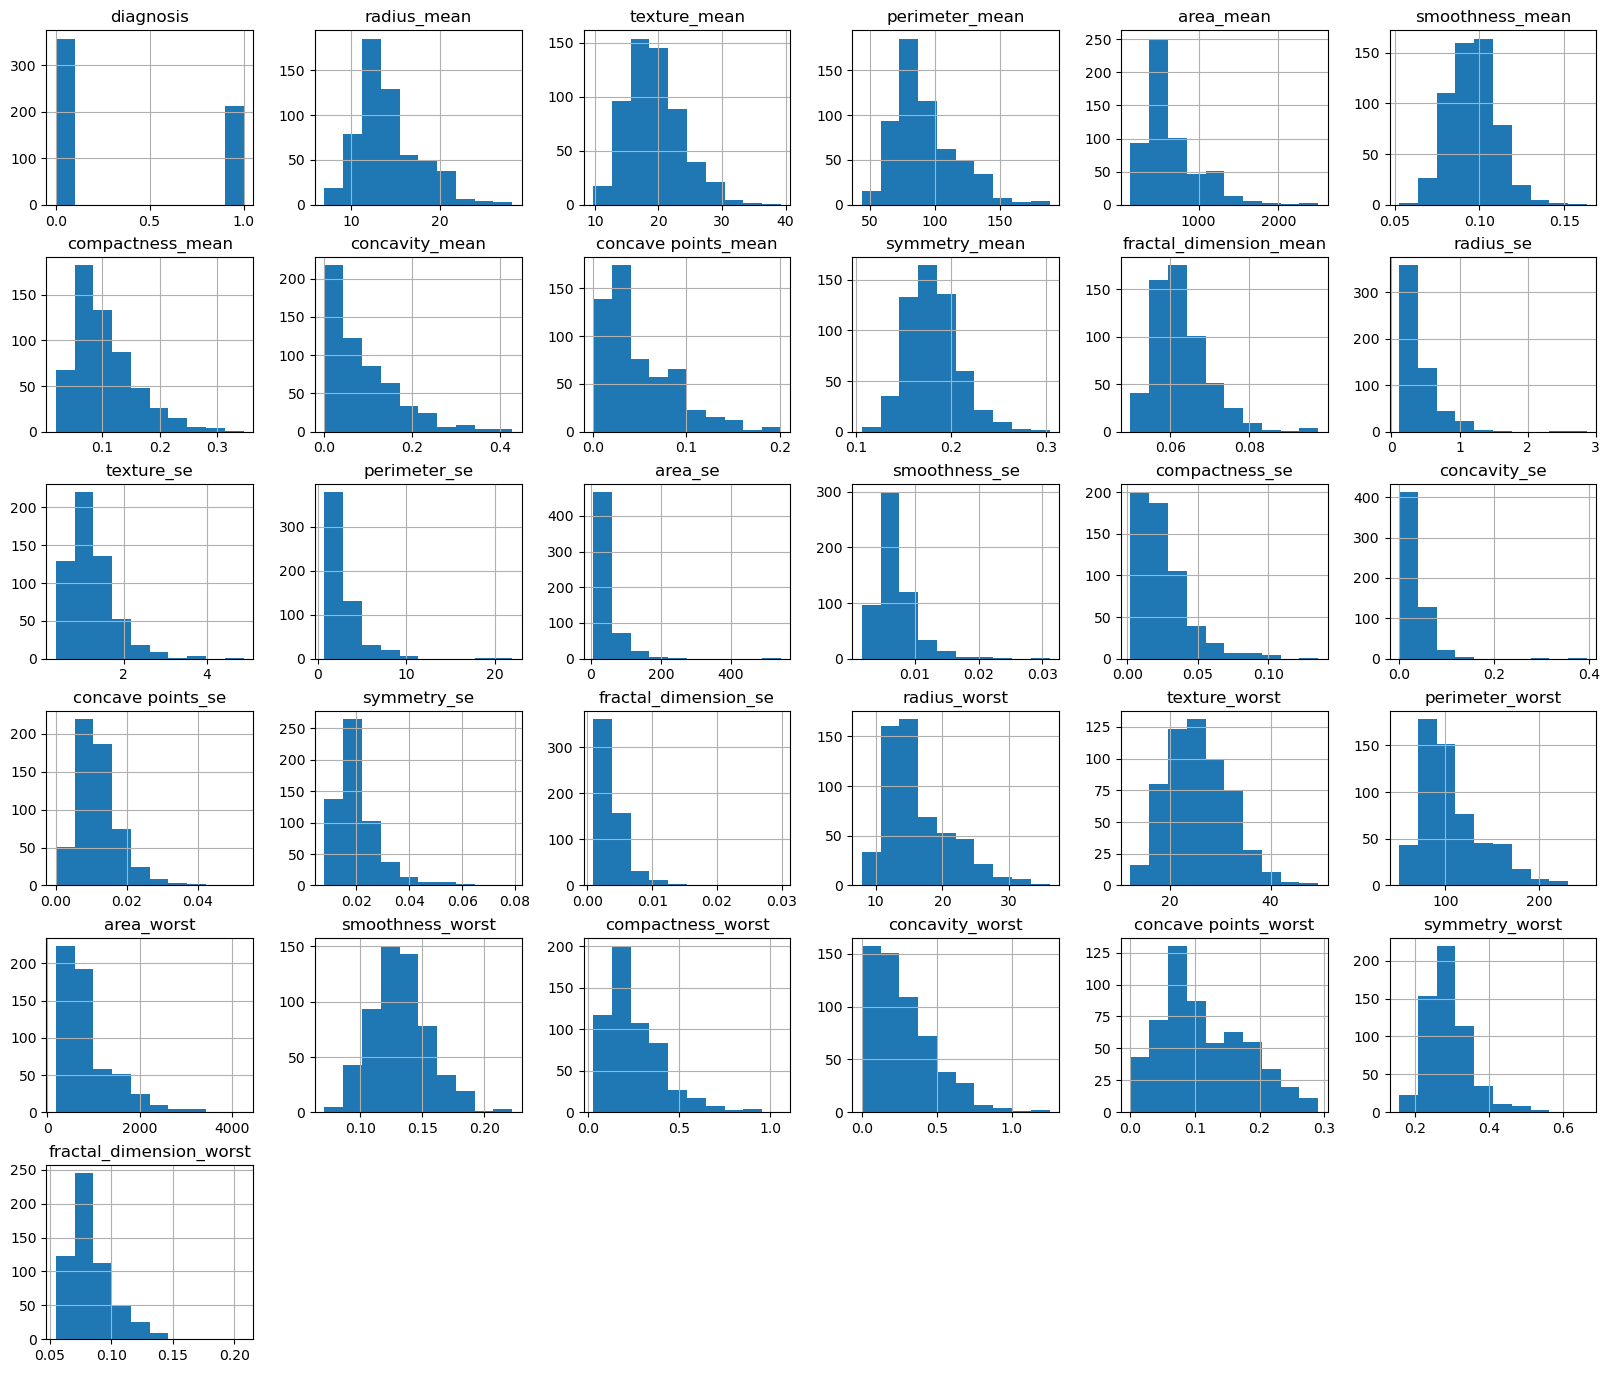

In [71]:
# Limpio el df
df = df.dropna()
df['diagnosis'] = df['diagnosis'].astype(int)

# Muestro histogramas de las variables de entrada para vizualizar valores atípicos
df.hist(figsize=(20, 17))

Filas con Valores Atípicos:
 diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

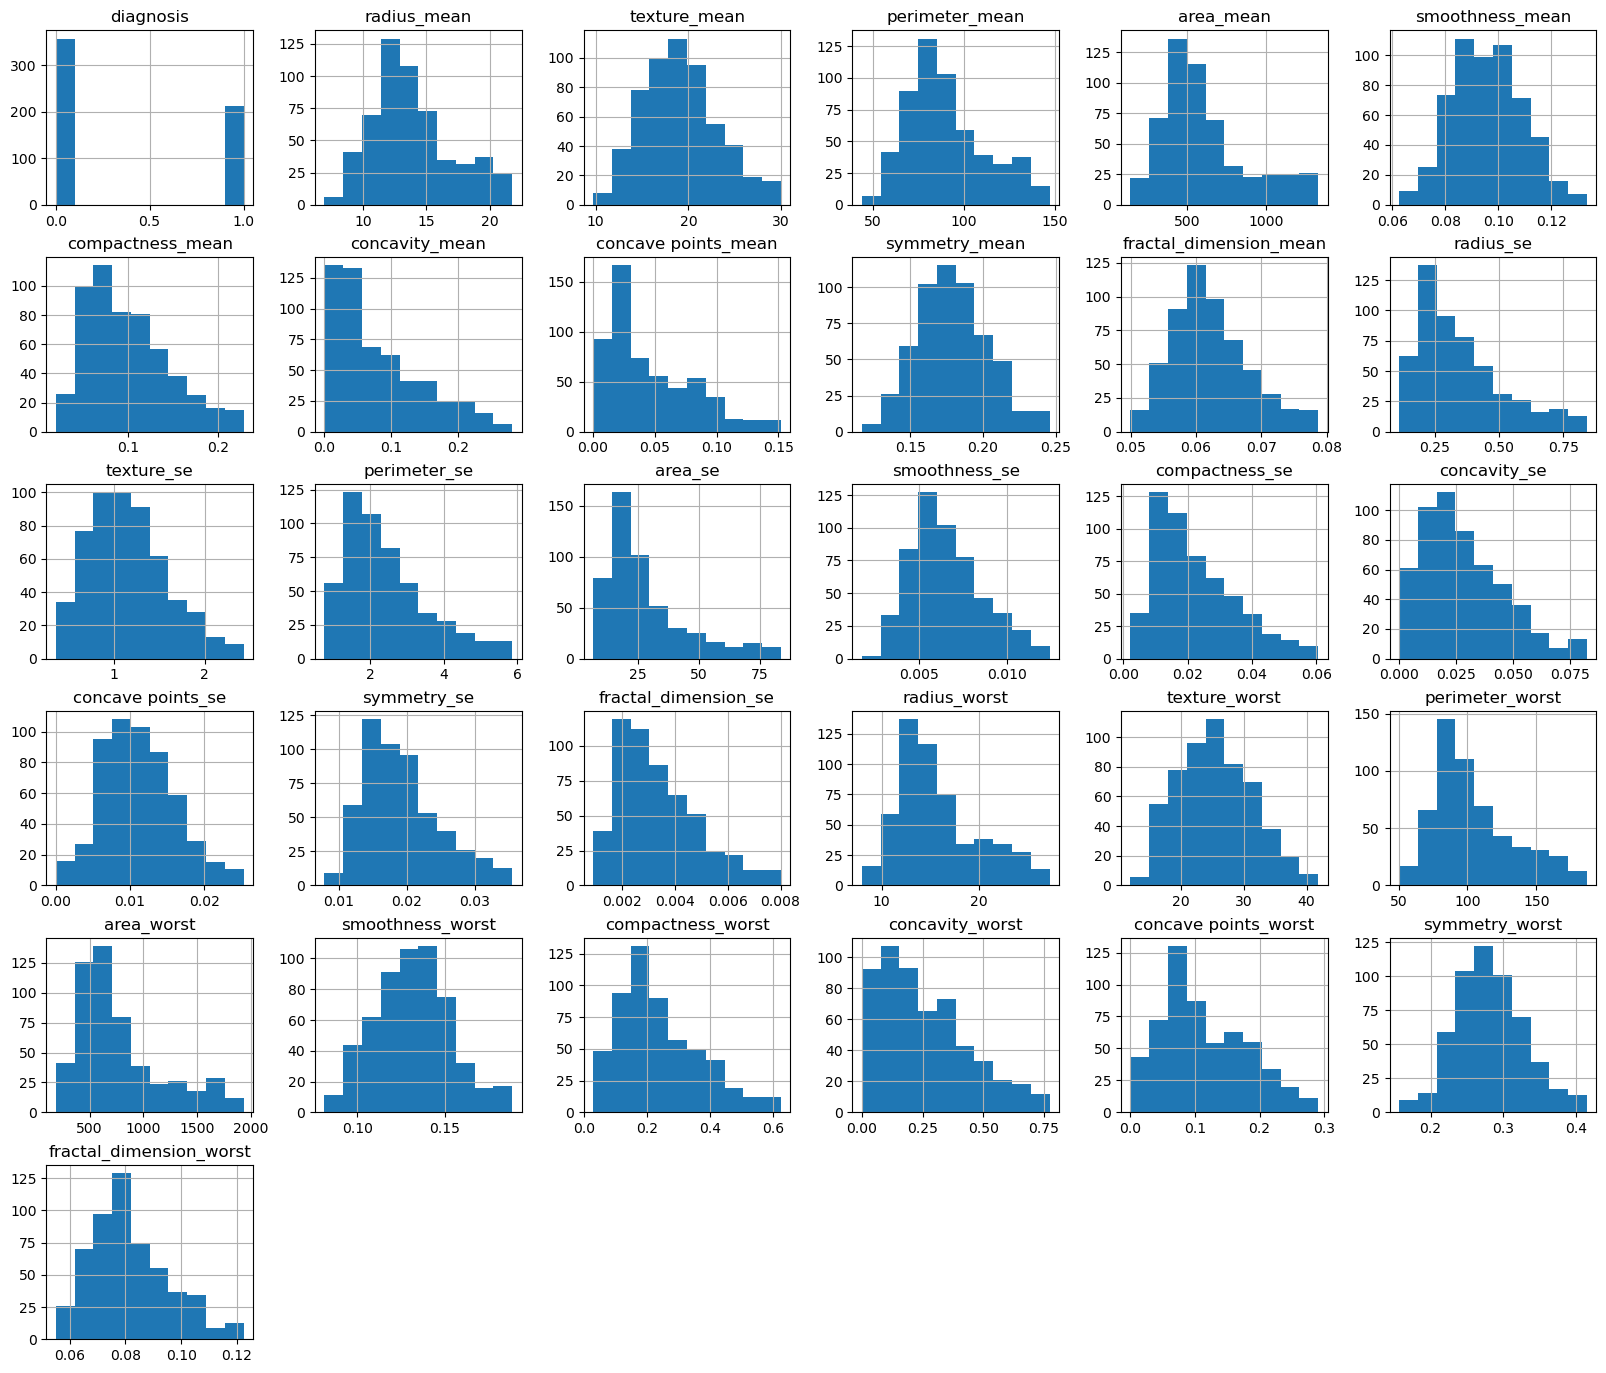

In [72]:
df_salida = df['diagnosis']

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:\n", num_outliers)

# Saco del dataframe las filas con valores atípicos (y reinserto la columna de salida original)
df = df.where(np.invert(outliers))
df['diagnosis'] = df_salida

# Histograma limpio
df.hist(figsize=(20, 17))

In [8]:
# describe() genera una tabla que incluye estadísticas como la media, la desviación estándar, los cuartiles 
# el valor mínimo y el máximo para cada columna numérica.
# El .T al final transpuesta la tabla, convirtiendo las filas en columnas y viceversa.
df_stats = df.describe().T
# Para normalizar: (valor - promedio) / desv_estandar
df_n = (df - df_stats['mean']) / df_stats['std']
# genera estadísticas descriptivas para el DataFrame
df_n.describe()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-2.185325e-16,-1.248757e-16,1.248757e-17,1.873136e-16,1.748260e-16,-3.246768e-16,-4.995028e-17,0.000000,2.247763e-16,2.497514e-17,...,-8.241796e-16,-8.366672e-16,-1.592165e-16,-2.372638e-16,1.748260e-16,9.365678e-17,2.747265e-16,6.243785e-17,-1.123881e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.453164e+00,-7.371804e-01,-1.221348e+00,-1.608721e+00,-1.296957e+00,-1.442609e+00,-1.260710e+00,-1.911765,-1.743529e+00,-1.113893e+00,...,-1.725382e+00,-3.109349e+00,-1.774504e+00,-2.680337e+00,-2.741705e+00,-1.531542e+00,-2.159060e+00,-2.227289e+00,-1.552898e+00,-2.222039
25%,-6.666089e-01,-4.943192e-01,-6.415713e-01,-7.464292e-01,-6.923171e-01,-6.804845e-01,-7.372951e-01,-0.673897,-7.557349e-01,-7.430941e-01,...,-6.743279e-01,-7.103378e-01,-6.234697e-01,-6.906227e-01,-7.026215e-01,-6.511078e-01,-6.412994e-01,-7.253249e-01,-6.941984e-01,-0.747971
50%,-2.949274e-01,-3.474770e-01,-3.408813e-01,-2.217454e-01,-2.807733e-01,-2.692639e-01,-3.973715e-01,-0.140372,-2.232725e-01,-3.419391e-01,...,-2.688030e-01,-3.486040e-02,-2.201415e-01,-4.680159e-02,-7.156354e-02,-2.192375e-01,-1.272975e-01,-1.045442e-01,-1.973239e-01,-0.043477
75%,3.631877e-01,1.066787e-01,3.572747e-01,4.934227e-01,3.893116e-01,5.391944e-01,6.463664e-01,0.472241,7.118836e-01,5.255994e-01,...,5.215568e-01,6.356397e-01,3.680315e-01,5.970195e-01,5.303125e-01,3.553798e-01,4.497425e-01,5.836621e-01,4.661422e-01,0.657762
max,5.245913e+00,1.103214e+01,5.924959e+00,4.564409e+00,6.138081e+00,5.108382e+00,3.924477e+00,6.643755,2.683516e+00,4.239858e+00,...,4.090590e+00,4.766717e+00,8.022940e+00,3.951897e+00,4.480808e+00,7.065700e+00,6.040726e+00,4.647799e+00,6.649429e+00,3.882489


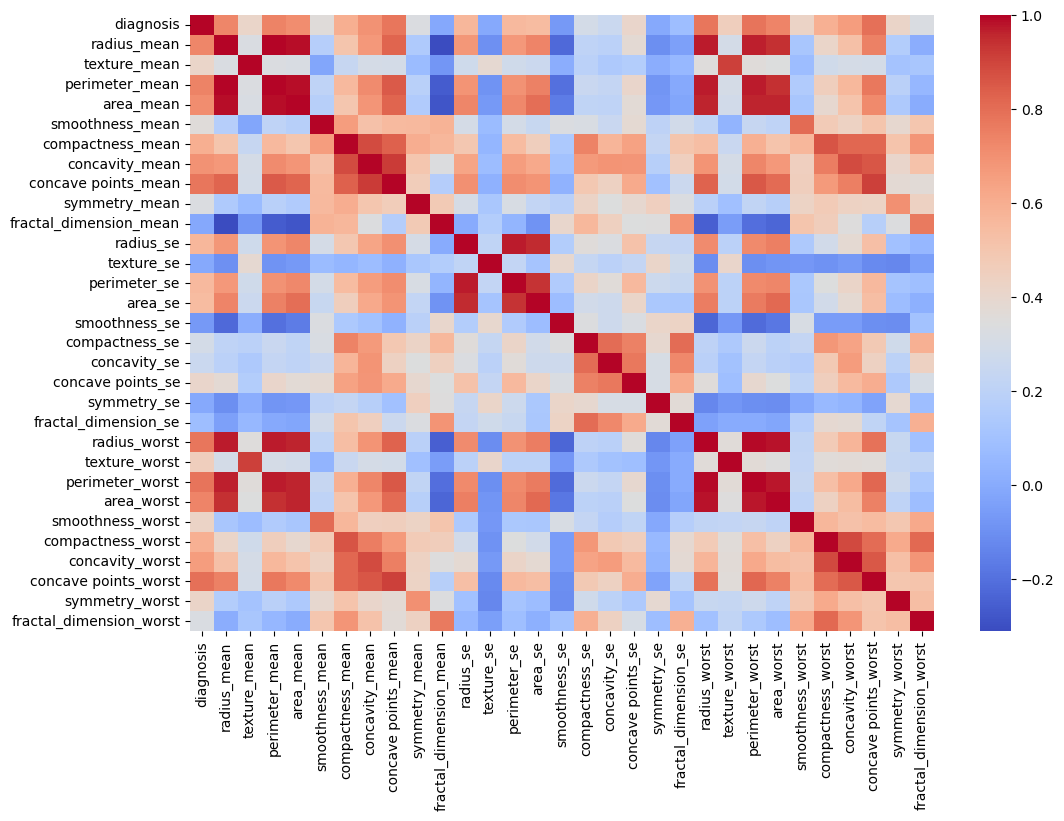

In [20]:
# Eliminar filas con valores nulos
df = df.dropna()

# Calcular la matriz de correlación
plt.figure(figsize=(12, 8))
correlaciones = df.corr(method="pearson")
sns.heatmap(correlaciones, cmap='coolwarm')
plt.show()

### 
Al analizar la matriz de correlación, se observa que las variables relacionadas con las características celulares,como el radio promedio y la textura media, presentan una fuerte correlación positiva con la variable de diagnóstico (diagnosis). Esto sugiere que a medida que aumentan estos valores, es más probable que el cáncer sea maligno. Por otro lado, variables como el área de la célula y la suavidad tienen una correlación inversa significativa, lo que indica que valores más bajos en estas características podrían estar asociados con un diagnóstico benigno.
